# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

38 sample has sim params = [0.252, -2.321, 0.5429999999999999, -0.1499999999999999, 14.845]
simulation has 3 redshifts
undersample_z = 1
39 sample has sim params = [0.40800000000000003, -2.273, 1.7850000000000004, -0.33000000000000007, 10.434999999999999]
simulation has 3 redshifts
undersample_z = 1
40 sample has sim params = [0.42000000000000004, -2.317, 1.461, 0.6299999999999999, 7.915]
simulation has 3 redshifts
undersample_z = 1
41 sample has sim params = [0.336, -2.339, 2.4330000000000003, 0.9300000000000002, 8.965]
simulation has 3 redshifts
undersample_z = 1
42 sample has sim params = [0.348, -2.275, 1.569, 1.4699999999999998, 11.065000000000001]
simulation has 3 redshifts
undersample_z = 1
43 sample has sim params = [0.444, -2.309, 1.299, -1.0499999999999998, 13.795]
simulation has 3 redshifts
undersample_z = 1
44 sample has sim params = [0.43200000000000005, -2.253, 1.7310000000000003, 0.2100000000000002, 14.635]
simulation has 3 redshifts
undersample_z = 1
45 sample has sim p

 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set in basedi

In [4]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu)

Note: redshifts have been re-sorted (earliest first)


In [5]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,min_kp_kms=min_kp_kms,
                           verbose=False,ignore_emu_cov=ignore_emu_cov)

In [15]:
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=20)

use input likelihood
setup with 20 walkers
set 20 walkers with 7 dimensions
asked to emulate model {'Delta2_p': 0.6300728199380841, 'n_p': -2.299479322051701, 'alpha_p': -0.21637596619512572, 'f_p': 0.9583552547543537, 'mF': 0.8451617850899488, 'gamma': 1.7771177702986658, 'sigT_Mpc': 0.20543521228955103, 'kF_Mpc': 3.7789984377198946}
asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.9813695511850181, 'mF': 0.6614454040769973, 'gamma': 1.652762156879292, 'sigT_Mpc': 0.13349953863314917, 'kF_Mpc': 7.375904902354807}
asked to emulate model {'Delta2_p': 0.23205325295753354, 'n_p': -2.299479861066885, 'alpha_p': -0.216376343226051, 'f_p': 0.9898232760729431, 'mF': 0.4360216996266742, 'gamma': 1.5623291076048154, 'sigT_Mpc': 0.10688169299567894, 'kF_Mpc': 12.502468068823436}
asked to emulate model {'Delta2_p': 0.6300728199380841, 'n_p': -2.299479322051701, 'alpha_p': -0.21637596619512572, 'f_p': 0.9583552547543537,

asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.9813695511850181, 'mF': 0.6917396138622152, 'gamma': 1.2965222095799442, 'sigT_Mpc': 0.09582247527033654, 'kF_Mpc': 19.58979367301676}
asked to emulate model {'Delta2_p': 0.23205325295753354, 'n_p': -2.299479861066885, 'alpha_p': -0.216376343226051, 'f_p': 0.9898232760729431, 'mF': 0.49266584391802176, 'gamma': 1.2255812962873855, 'sigT_Mpc': 0.08213241714307205, 'kF_Mpc': 33.205521642983605}
asked to emulate model {'Delta2_p': 0.6300728199380841, 'n_p': -2.299479322051701, 'alpha_p': -0.21637596619512572, 'f_p': 0.9583552547543537, 'mF': 0.8278334191735368, 'gamma': 1.4594531865541127, 'sigT_Mpc': 0.14323820663391562, 'kF_Mpc': 5.678068797232419}
asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.9813695511850181, 'mF': 0.6543435616207227, 'gamma': 1.357326473679988, 'sigT_Mpc': 0.1085

In [27]:
sampler.p0[:,1]

array([0.48055297, 0.44404093, 0.31815242, 0.36826882, 0.84381398,
       0.60590612, 0.45733827, 0.67283747, 0.57537998, 0.35614319,
       0.71461574, 0.61866564, 0.91027142, 0.63198318, 0.58864164,
       0.58397902, 0.82874625, 0.32718988, 0.23896738, 0.29185018])

In [7]:
for p in sampler.like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
T0_1 0.13626544653787526 0 1
T0_2 9.546039892898634 7 11
T0_3 -1.2041429220366868 -2 -0.5
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -0.8077668277205104 -2.995732273553991 -0.6931471805599453


In [10]:
theory.T_model_fid.get_T0(z=3.0)

8418.58007621049

### Run burn-in chains

In [8]:
sampler.like.go_silent()

In [9]:
sampler.run_burn_in(nsteps=500)

start burn-in, will do 500 steps
0 [0.4922177  0.49953652 0.48582037 0.47482408 0.49725192 0.51141463
 0.53765254]
20 [0.50297444 0.52118896 0.48710394 0.49505833 0.52782517 0.51028656
 0.55041621]
40 [0.49221715 0.53692898 0.48075473 0.51605976 0.52846324 0.50711079
 0.54404555]
60 [0.49647605 0.53478641 0.48584146 0.53863302 0.53661974 0.48906928
 0.5433669 ]
80 [0.50187847 0.54584643 0.47853678 0.54335551 0.54832653 0.49298922
 0.53212625]
100 [0.5020688  0.54024913 0.48893639 0.55306195 0.56594046 0.47025959
 0.52541808]
120 [0.50179315 0.54062522 0.48383379 0.5584639  0.56531226 0.4507193
 0.52481607]
140 [0.49992499 0.54738337 0.47836678 0.564273   0.56114462 0.44021784
 0.52129238]
160 [0.50230861 0.54778906 0.47198494 0.56747336 0.5474464  0.42833017
 0.51622679]
180 [0.50047125 0.55651967 0.46446649 0.56952583 0.53691719 0.41599338
 0.51627388]
200 [0.50569866 0.55491409 0.45753554 0.57033099 0.53674787 0.39654496
 0.5081775 ]
220 [0.51010786 0.54830737 0.46078494 0.57343846 0

### Run main chains

In [10]:
sampler.run_chains(nsteps=2000)

0 [0.49933316 0.57761471 0.47019098 0.59631796 0.50263855 0.377031
 0.49409237]
20 [0.49935301 0.57973404 0.47810745 0.59617454 0.49643303 0.38204956
 0.49112245]
40 [0.49930074 0.57585209 0.49068565 0.59780664 0.49216267 0.37790594
 0.48677436]
60 [0.49738914 0.5795685  0.47947362 0.59853584 0.49077468 0.36495267
 0.48823265]
80 [0.49538026 0.58464277 0.48279163 0.59970675 0.48840276 0.37004134
 0.48824834]
100 [0.49414887 0.58280698 0.49470945 0.60018339 0.49854657 0.37033673
 0.48948912]
120 [0.49615267 0.59046597 0.48846527 0.59738432 0.48062213 0.37749429
 0.48967267]
140 [0.49500192 0.59135856 0.50512907 0.59678841 0.47881146 0.36893168
 0.49064887]
160 [0.49425477 0.59357404 0.50045767 0.59640044 0.46832264 0.3697388
 0.4911619 ]
180 [0.49616183 0.59492848 0.48547429 0.59519233 0.46214459 0.37254123
 0.48679386]
200 [0.49168263 0.59913179 0.48931    0.59723932 0.46841925 0.36819503
 0.49176539]
220 [0.49288427 0.59223958 0.50003944 0.59962101 0.47908243 0.3699683
 0.4882495 ]
24

1960 [0.36991574 0.72832807 0.49143251 0.68147564 0.7580049  0.32493213
 0.61015733]
1980 [0.36984468 0.72697395 0.47778485 0.68237049 0.75847067 0.32292027
 0.61039761]


In [11]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.119


### Plot results in cube units (0 < x < 1)

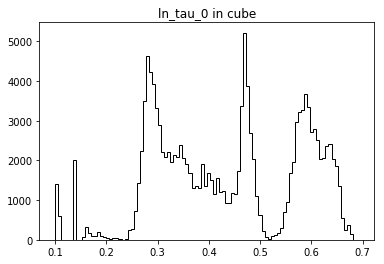

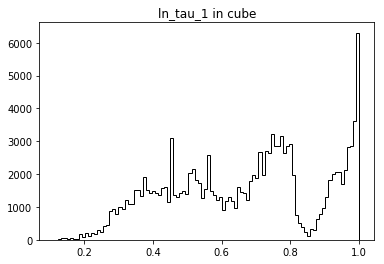

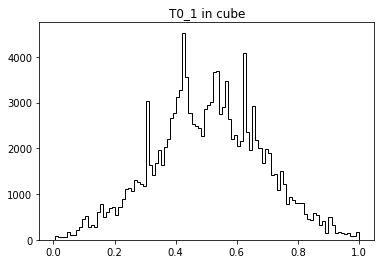

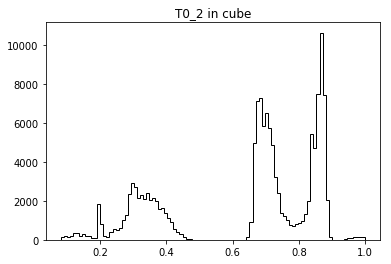

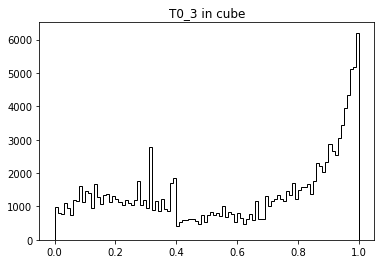

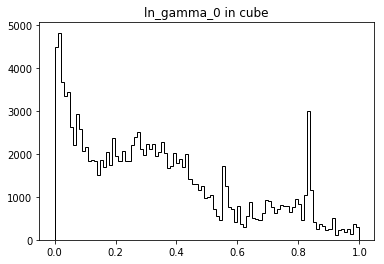

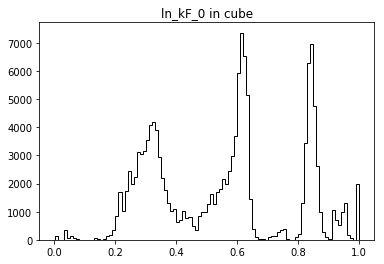

In [12]:
sampler.plot_histograms(cube=True)

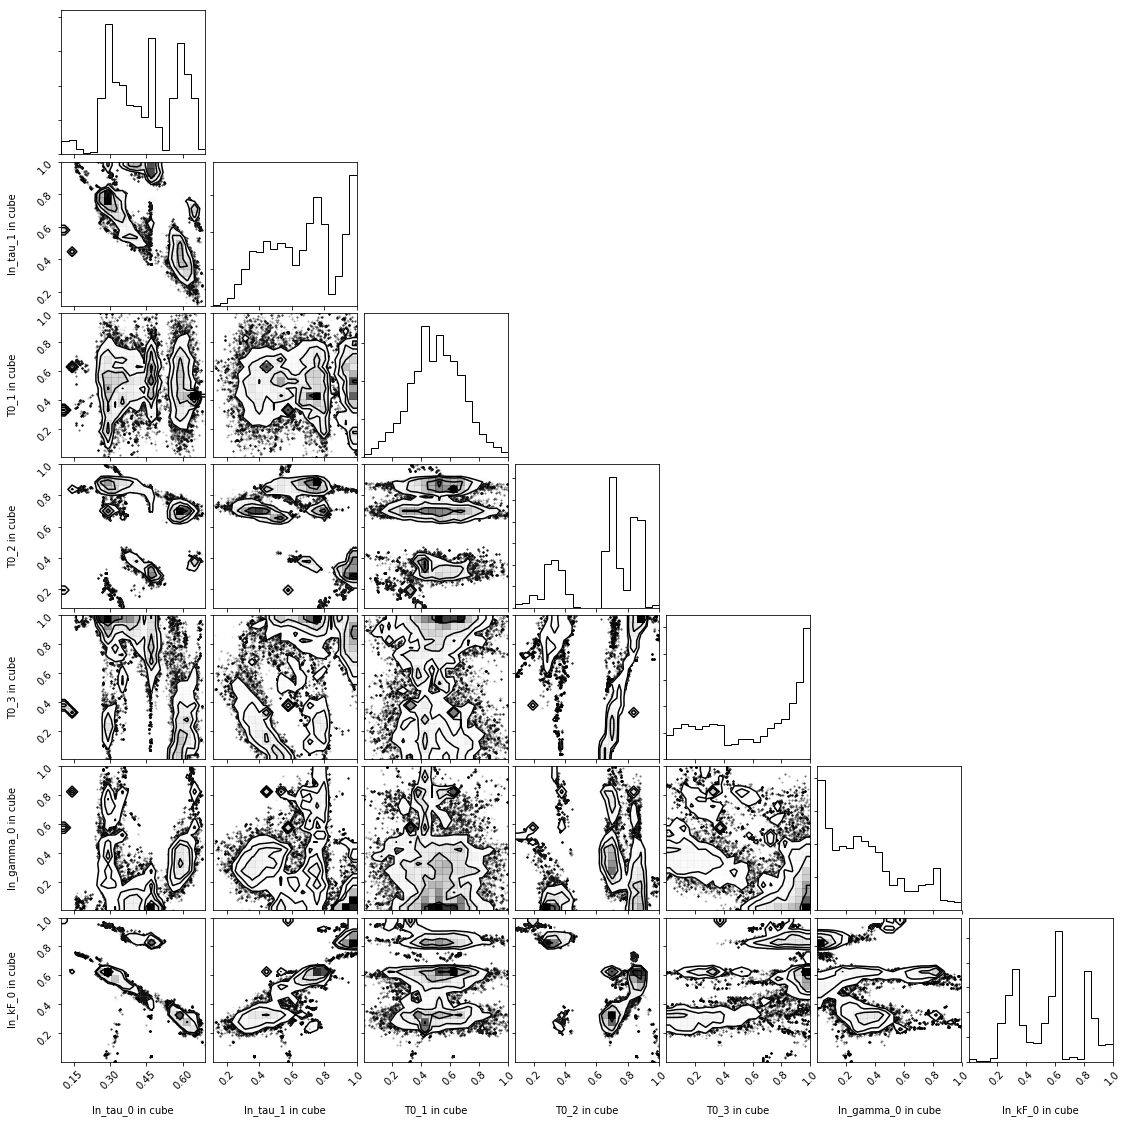

In [13]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

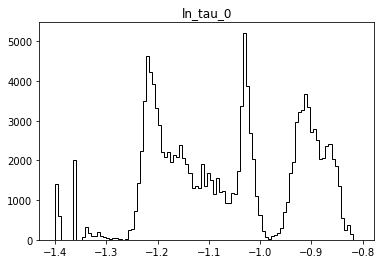

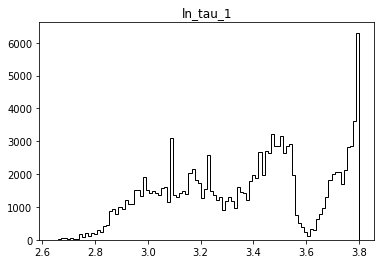

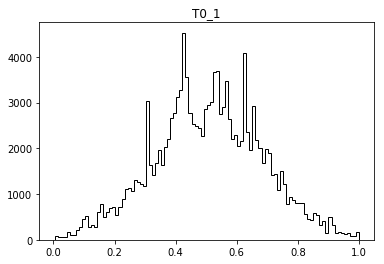

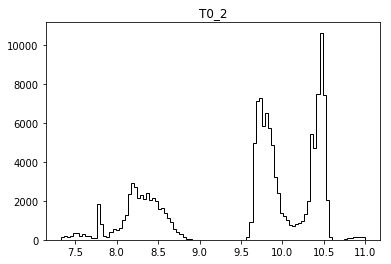

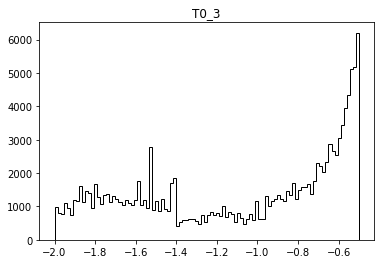

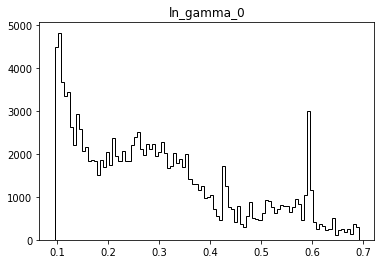

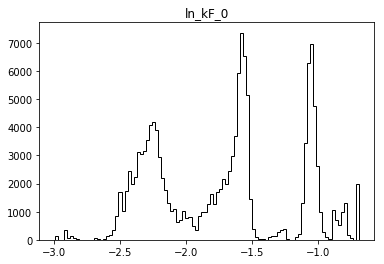

In [14]:
sampler.plot_histograms(cube=False)

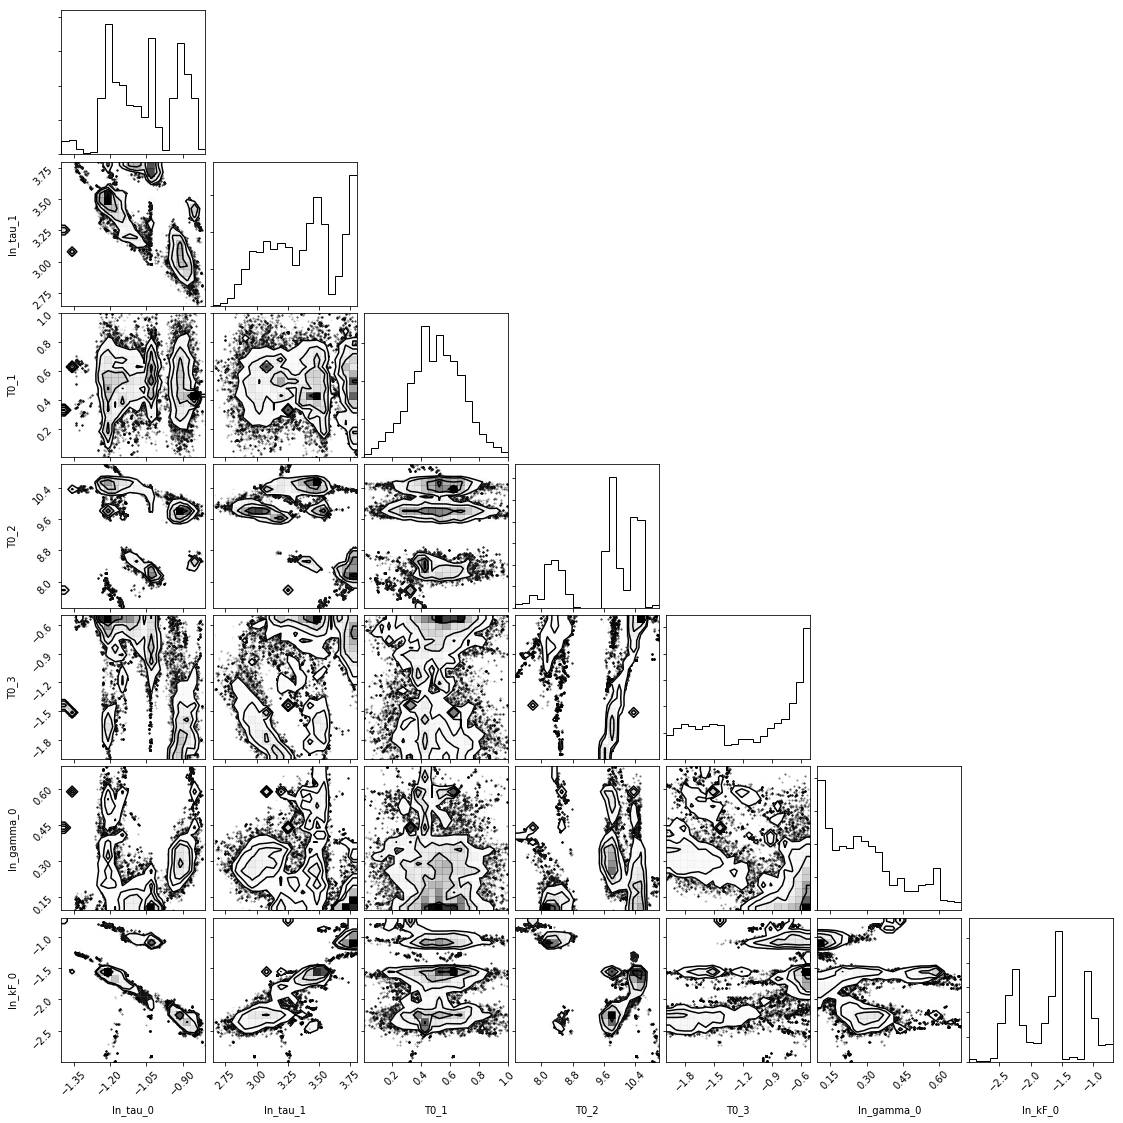

In [15]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [16]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

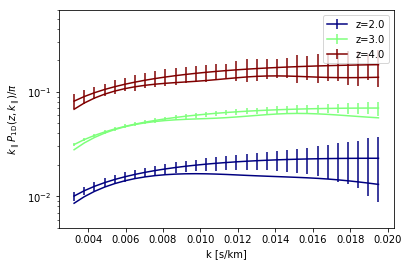

In [17]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

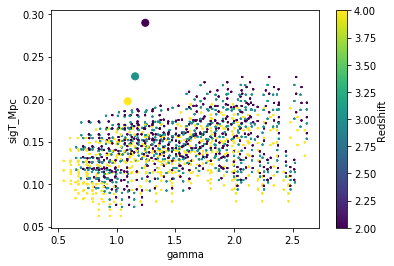

In [18]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

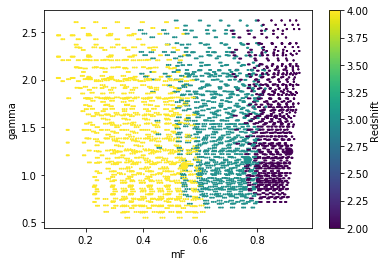

In [19]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

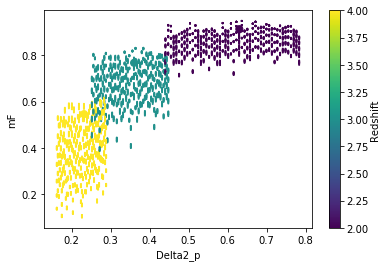

In [20]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

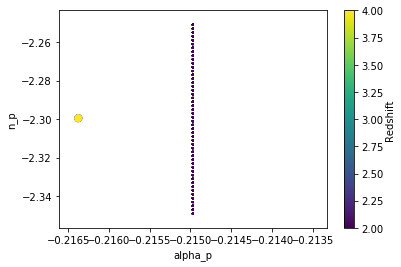

In [21]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

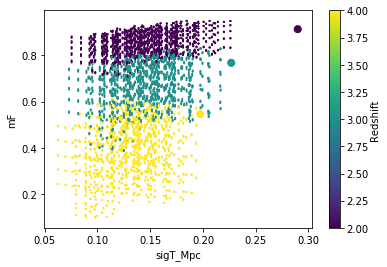

In [22]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

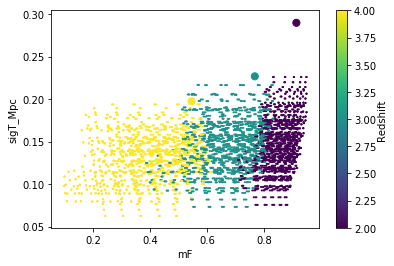

In [23]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

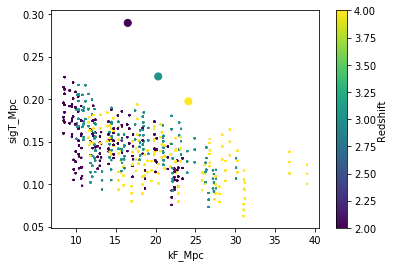

In [24]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

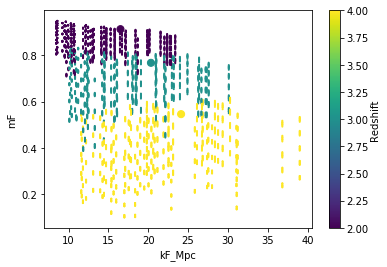

In [25]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [ ]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [ ]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

In [ ]:
new_sampler.plot_corner(cube=False)

In [ ]:
new_sampler.plot_corner(cube=True)

In [ ]:
new_sampler.plot_histograms(cube=False)